## Group Number : 16
## Group Members : Nishant Jalasutram, Sravya Neelamraju, Rashmi Gulati
## PG IDs : 1202000051,

In [55]:
import pandas as pd
import math as math
import datetime as dt
import scipy.stats as st
import numpy as np

In [91]:
df = pd.read_csv("SA1_Group_16.csv")
df = df.infer_objects()
df.head()

C:\Users\chitra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Index,SL_NO,ST_CODE,DIST_CODE,TTM_CODE,SECTOR_CODE,VT_CODE,WORKED_FOR_1D,CLOSED_Y,OPER_DUR_MM,...,REPAYMENT_DELAY,DECLINE_IN_GOP,DMD_PROB,WORK_CAP_PROB,RAW_MTRL_PROB,POWER_RPOB,LABOUR_PROB,MKT_PROB,EQUIP_PROB,MGMT_PROB
0,23642,43642,28,16,21,2,416030,1,,12,...,,2,,,,,,,,
1,24539,81050,28,13,,2,413070,1,,12,...,,2,,,,,,,,
2,41324,1026,28,1,32,1,1139,1,,6,...,,2,,,,,,,,
3,11661,15812,28,15,37,2,19635,1,,6,...,,1,1,1,2,2,2,1,2,2
4,17463,61915,28,19,2,1,22631,1,,7,...,,2,,,,,,,,


### Dropping columns with more than 20% nulls and unnecessary columns

In [92]:
# Replacing all spaces with nulls 

df.replace({' ':None},inplace=True)

# # Ignoring columns with more than 20% null values
# s1 = df.isnull().mean()*100 > 20
# df.drop(columns=list(s1[s1.values].index),inplace=True)

# # Removing few more columns which do not have any significance

# list1 = ['ST_CODE','NET_STATUS_Year2', 'OS_LOAN_Year3', 'DIST_CODE', 'KNOW_HOW', 'MAN_CASTE', 'DECLINE_IN_GOP', 
# 'COMP_EXIST','ACC_EXIST','REG_UNDER_SPR','MAN_BY','OPER_NATURE','ACTI_NATURE','ANCI_UNIT','SURVEY_CODE','WORKED_FOR_1D',
# 'NIC_CODE']
# df.drop(columns=list1,inplace=True)
# df.shape

### Creating two metrics necessary for our calculations:
#### a) Return on assets = (Net worth at the end of Year 3)/(Market value of Fixed assets at the end of Year 3)
#### b) Gross output per employee = (Gross output at the end of Year 3)/(Total number of employees)

In [93]:
df['GOP3_PerEmp'] = df['GOP_Year3']/df['EMP_TOTAL']
df['returnOnAssets'] = df['NET_Year3']/df['MKT_VAL_FA']

### Removing invalid values:
#### Ex: 
##### 1. Removing rows where MKT_VAL_FA = 0 as their existence will result in "inf" value in returnOnAssets column
##### 2. Removing rows where the z-score of the variable is beyond 4

In [94]:
# 1. Removing rows where MKT_VAL_FA as we cannot have divide by 0 which results to inf

df.drop(index=df[df['MKT_VAL_FA'] == 0].index.values,axis=0,inplace=True)

In [97]:
# # 2. Removing rows where the z-score of the variable is beyond 4

df['GOPEMP_Z'] = st.zscore(df['GOP3_PerEmp'])
df.drop(index=df[df['GOPEMP_Z'] > 4].index.values,axis=0,inplace=True)

df['ROA_Z'] = st.zscore(df['returnOnAssets'])
df.drop(index=df[df['ROA_Z'] > 4].index.values,axis=0,inplace=True)

# df[df['GOPEMP_Z'] > 4]

# # len(df[df['ROA_Z'] > 4].index.values)

In [95]:
df.shape

(9967, 67)

In [43]:
# IQR_GOP3 = st.iqr(df['GOP_Year3'])
# Q1_GOP3 = np.quantile(df['GOP_Year3'],0.25)
# Q3_GOP3 = np.quantile(df['GOP_Year3'],0.75)

# L_Outlier_GOP3 = Q1_GOP3 - 1.5*IQR_GOP3
# H_Outlier_GOP3 = Q3_GOP3 + 1.5*IQR_GOP3

# df.drop(df[(df['GOP_Year3'] < L_Outlier_GOP3) | (df['GOP_Year3'] > H_Outlier_GOP3)].index.values,axis=0,inplace=True)

In [44]:
# IQR_ROA = st.iqr(df['returnOnAssets'])
# Q1_ROA = np.quantile(df['returnOnAssets'],0.25)
# Q3_ROA = np.quantile(df['returnOnAssets'],0.75)

# L_Outlier_ROA = Q1_ROA - 1.5*IQR_ROA
# H_Outlier_ROA = Q3_ROA + 1.5*IQR_ROA

# df.drop(df[(df['returnOnAssets'] < L_Outlier_ROA) | (df['returnOnAssets'] > H_Outlier_ROA)].index.values,axis=0,inplace=True)

In [45]:
# IQR_GOPEMP = st.iqr(df['GOP3_PerEmp'])
# Q1_GOPEMP = np.quantile(df['GOP3_PerEmp'],0.25)
# Q3_GOPEMP = np.quantile(df['GOP3_PerEmp'],0.75)

# L_Outlier_GOPEMP = Q1_GOPEMP - 1.5*IQR_GOPEMP
# H_Outlier_GOPEMP = Q3_GOPEMP + 1.5*IQR_GOPEMP

# df.drop(df[(df['GOP3_PerEmp'] < L_Outlier_GOPEMP) | (df['GOP3_PerEmp'] > H_Outlier_GOPEMP)].index.values,axis=0,inplace=True)

In [99]:
df.shape
samplesize

9915

### Note: We do not know the population standard deviation Sigma. However, the sample given is 10,000 and is a large sample. Hence we can use z-score instead of t-score and use sample standard deviation for calculating the confidence intervals.

### 1. Calculate a 95 percent confidence interval for the “Gross output – Year 3 (Rs)”

In [131]:
# We can calculate the sample mean, sample std. dev. for the column Gross Output - Year 3 (Rs.)

meanGOP3 = df.GOP_Year3.mean()
stdevGOP3 = df.GOP_Year3.std()
samplesize = df.GOP_Year3.count()

# Based on z table, z score for 95% CI is +/- 1.96

upperLimGOP3 = meanGOP3 + 1.96 * (stdevGOP3/math.sqrt(samplesize))
lowerLimGOP3 = meanGOP3 - 1.96 * (stdevGOP3/math.sqrt(samplesize))
    
print("95%% Confidence Interval for Gross Output Year 3 (Rs): [%.2f, %.2f]"%(lowerLimGOP3, upperLimGOP3))

95% Confidence Interval for Gross Output Year 3 (Rs): [1362437.61, 1965975.61]


### 2. Define two different measures that you consider most appropriate for measuring the performance of the units.  This definition is up to you.  These can be the variables that are already in the data or new variables defined based on the existing variables.  

### For example, you can define a metric “Gross output per employee” by dividing the gross output of the year by the total number of employees. Please explain in one paragraph why you have selected these two measures and why you think they are most appropriate. Remaining analysis is to be carried out based on these definitions.

In [ ]:
# Two measures are taken in to account for our analysis:

# a) Return on assets = (Net worth at the end of Year 3)/(Market value of Fixed assets at the end of Year 3)
#    - Return on assets (ROA) is an indicator of how profitable a company is relative to its total assets. 
#      ROA gives a manager, investor, or analyst an idea as to how efficient a company's management is at using its assets to generate earnings. 
#      Return on assets is displayed as a percentage; the higher the ROA the better. 
#      Source : Investopedia.com
# b) Gross output per employee = (Gross output at the end of Year 3)/(Total number of employees)
#    - This metric indicates the gross output generated in the year3 per each employee. 
#      It indicates how efficient are the employees performing in the units for generating the output. 
#      The higher this value, the better is the performance of the unit.

# a) df['returnOnAssets']
# b) df['GOP3_PerEmp']

### 3.	Calculate 99% confidence interval for the population mean for each of the two metrics defined by you.  Interpret these confidence intervals in terms of their relevance to the management.

In [135]:
# z score for 99% interval = 2.576

# 1. Taking first variable i.e., return on Assets

meanROA = df['returnOnAssets'].mean()
sdROA = df['returnOnAssets'].std()

ROA_LL = meanROA - (2.576 * (sdROA/math.sqrt(samplesize)))
ROA_UL = meanROA + (2.576 * (sdROA/math.sqrt(samplesize)))

print("99%% Confidence Interval for Return on Assets: [%.2f%%, %.2f%%]"%(ROA_LL,ROA_UL))

# 2. Taking second variable i.e., Gross output per employee in Year 3

meanGOP3_PerEmp = df['GOP3_PerEmp'].mean()
sdGOP3_PerEmp = df['GOP3_PerEmp'].std()

GOP3_PerEmp_LL = meanGOP3_PerEmp - (2.576 * (sdGOP3_PerEmp/math.sqrt(samplesize)))
GOP3_PerEmp_UL = meanGOP3_PerEmp + (2.576 * (sdGOP3_PerEmp/math.sqrt(samplesize)))

print("99%% Confidence Interval for Gross output per employee in Year 3 (Rs.): [%.2f, %.2f]"%(GOP3_PerEmp_LL,GOP3_PerEmp_UL))

99% Confidence Interval for Return on Assets: [1.32%, 1.39%]
99% Confidence Interval for Gross output per employee in Year 3 (Rs.): [124346.55, 151664.67]


### 4 a. What is the probability that a firm selected at random is a SSSBE unit?
### b. What is the probability that a firm selected at random is GOOD in performance? (Calculate the average of the first performance measure that you had defined in question 2 above.  If the firm’s performance is above this average, it considered good. If it is below average, it is considered Bad)
### c. What is the probability that a firm selected is a SSSBE Unit and ALSO GOOD in performance? 
### d. What can you say about the performance of the SSSBE units in terms of GOOD or BAD based on the probabilities calculated above?


In [144]:
# a. Unit type field indicates whether the unit is SSI/SSSBE type.

unitCounts = df.groupby('UNIT_TYPE').count()['Index']
probOfSSSBE = unitCounts[1]/samplesize

print("Probability of a firm selected at random is a SSSBE unit: ",probOfSSSBE)

# b. The first metric is return on assets. The mean for this value is already calculated in variable meanROA
# Find out the count of units which are above or equal to the average of the first metric and then find the probability

countOfUnitsAboveROAavg = df[df.loc[:,'returnOnAssets'] >= meanROA].count()['Index']
probOfUnitsAboveROAavg = countOfUnitsAboveROAavg/samplesize

print("Probability that a firm selected at random is GOOD in performance: ", probOfUnitsAboveROAavg)

# c. We need a joint probability that a firm is SSSBE unit and Good in performance which is an intersection of units 
# which are in part a and b of this problem

countOfSSSBEUnitsAboveROAavg = df[(df.loc[:,'UNIT_TYPE'] == '2') & (df.loc[:,'returnOnAssets'] >= meanROA)].count()['Index']
probOfSSSBEUnitsAboveROAavg = countOfSSSBEUnitsAboveROAavg/samplesize

print("Probability that a firm selected is a SSSBE Unit and ALSO GOOD in performance: ", probOfSSSBEUnitsAboveROAavg)

# d. From the above, we can see clearly that probability of finding a GOOD SSSBE unit is very less 
# i.e., only 237 units out of 2200 are GOOD. Hence, the performance can be termed as not good.

print("Performance of SSSBE units is bad based on above probability")

Probability of a firm selected at random is a SSSBE unit:  0.7789208270297528
Probability that a firm selected at random is GOOD in performance:  0.24417549167927383
Probability that a firm selected is a SSSBE Unit and ALSO GOOD in performance:  0.0
Performance of SSSBE units is bad based on above probability


### 5. 	Test the null hypothesis that the population average of the variable “Value of Exports for Year 3” = 87,300.  Carry out a one sided test.  Clearly state your null and alternate hypotheses.

In [136]:
# One sided test

# I chose to be as a government agency person who wants to evaluate that value of exports are less than 87,300.
# I need a conclusive evidence to prove that a factory has significantly lesser than 87,300 exports in Year 3.

H0 = "Value of exports for Year3 is greater than 87,300"
H1 = "Value of exports for Year 3 is less than 87,300"

popMeanToConsider = 87300
sampleMean = df['VOE_Year3'].mean()
sampleSD = df['VOE_Year3'].std()
alpha = 0.05

# Since sample size is large enough, we can use z-score

z_score = (sampleMean - popMeanToConsider)/(sampleSD/math.sqrt(samplesize))
p_value = st.norm.sf(abs(z_score))
print("P value for null hypothesis: ",p_value)
print("\n")
print("We can clearly see that p value is much less than alpha at 1%, 5% or 10%. Hence we can reject the null hypothesis.")

P value for null hypothesis:  1.1176061877110504e-05


We can clearly see that p value is much less than alpha at 1%, 5% or 10%. Hence we can reject the null hypothesis.


### 6.	There is a feeling within the Central Government Department for promotion of small scale units, be it SSSBE or SSI, that if the population proportion is less than 25%, there is a need for providing special incentives.  Based on your sample, would you recommend these special incentives for SSSBE or SSI or both?

In [146]:
print("Proportion of SSSBE units in given sample: ",probOfSSSBE)
print("Proportion of SSI units in given sample: ",1-probOfSSSBE)

# Let's first state the hypothesis statements for both SSSBE and SSI units separately
# We need to have significant evidence to prove that population proportion of either units is less than 25%.
# Hence, we need to reject null hypothesis with significant evidence, only then the incentive should be awarded.
# Claim of the proportion is to be less than 25%. Status-quo where no incentive is awarded is > 25%

H0SSSBE = "Population prop. of SSSBE units is greater than or equal to 25%"
H1SSSBE = "Population prop. of SSSBE units is less than 25%"

H0SSI = "Population prop. of SSI units is greater than or equal to 25%"
H1SSI = "Population prop. of SSI units is less than 25%"

# Testing the null hypothesis for SSSBE units for proportion

sampleProp = probOfSSSBE
popMeanToConsider = 0.25
# print(sampleProp)
z_score_SSSBE = (sampleProp - popMeanToConsider)/math.sqrt((popMeanToConsider*(1-popMeanToConsider))/samplesize)
# print(z_score_SSSBE)
p_score_SSSBE = st.norm.sf(abs(z_score_SSSBE))
print("Z score for SSSBE units: ",z_score_SSSBE)
print("P value for SSSBE units: ",p_score_SSSBE)

# Testing the null hypothesis for SSI units for proportion

sampleProp = 1-probOfSSSBE
popMeanToConsider = 0.25

z_score_SSI = (sampleProp - popMeanToConsider)/math.sqrt((popMeanToConsider*(1-popMeanToConsider))/samplesize)
#print(z_score_SSI)
p_score_SSI = st.norm.sf(abs(z_score_SSI))
print("Z score for SSI units: ",z_score_SSI)
print("P value for SSI units: ",p_score_SSI)

print("We can clearly see that p value is very high for SSSBE units and hence we should accept null hypothesis for SSSBE")
print("We can also clearly see that z-score is very less for SSI units and hence we should reject the null hypothesis for SSI")
print("We can recommend special incentives for SSI units only.")

Proportion of SSSBE units in given sample:  0.7789208270297528
Proportion of SSI units in given sample:  0.22107917297024715
Z score for SSSBE units:  121.62879148514754
P value for SSSBE units:  0.0
Z score for SSI units:  -6.650532670709063
P value for SSI units:  1.4601708283699366e-11
We can clearly see that p value is very high for SSSBE units and hence we should accept null hypothesis for SSSBE
We can also clearly see that z-score is much higher for SSI units and hence we cannot reject the null hypothesis for SSI
We can recommend special incentives for SSSBE units only.


### 7.	Some male chauvinists like to think that a larger proportion of SSSBEs are managed by men as compared to women.  Do you agree with this contention?  Explain your answer with appropriate statistical evidence.

In [52]:
# Preparing null & alternate hypothesis based on the statement given.
# There should be evidence that significantly higher proportion of SSSBE units are managed by women
# The claim is more women managers exist in SSSBE units. The status-quo is that less women managers exist in SSSBE units"
# We can also say that the claim of the male chauvinists is that the "Proportion of women managers is > 50%"
# Status-quo goes to Null hypothesis.
# Claim goes to Alternate hypothesis.

H0MgrGender = "There are 50% or less women managers in the SSSBE units"
H1MgrGender = "There are more than 50% women managers in the SSSBE units"

# Note that this is a right tailed test

# Gathering sample data and the proportion

dfSSSBE = df[df.loc[:,'UNIT_TYPE'] == 2]
# WOMAN_ENT = 1 represents managed by Woman, else No

mgrCountsSSSSBE = dfSSSBE.groupby('WOMAN_ENT').count()['Index']
# mgrCountsSSSSBE
print("Sample proportion of SSSBE units managed by Women: ",mgrCountsSSSSBE[1]/(mgrCountsSSSSBE[1] + mgrCountsSSSSBE[2]))

sampleProp = mgrCountsSSSSBE[1]/(mgrCountsSSSSBE[1] + mgrCountsSSSSBE[2])
propToConsider = 0.5

z_score = (sampleProp - propToConsider)/math.sqrt((sampleProp*(1-sampleProp))/samplesize)
print("Z-score based on given sample: ",z_score)

print("We can see that z-score we received is far left compared to any tolerance limit and we accept the null hypothesis.")
print("Hence, I disagree that larger proportion of SSSBEs units are managed by women.")

Sample proportion of SSSBE units managed by Women:  0.04261206419479801
Z-score based on given sample:  -180.3665635447756
We can see that z-score we received is far left compared to any tolerance limit and we accept the null hypothesis.
Hence, I disagree that larger proportion of SSSBEs units are managed by women.


### 8.	Comment on the distribution of the two metrics (variables) created by you.  Can you conclude that they follow normal distribution?  Explain the rationale for your conclusion.

<AxesSubplot:ylabel='Frequency'>

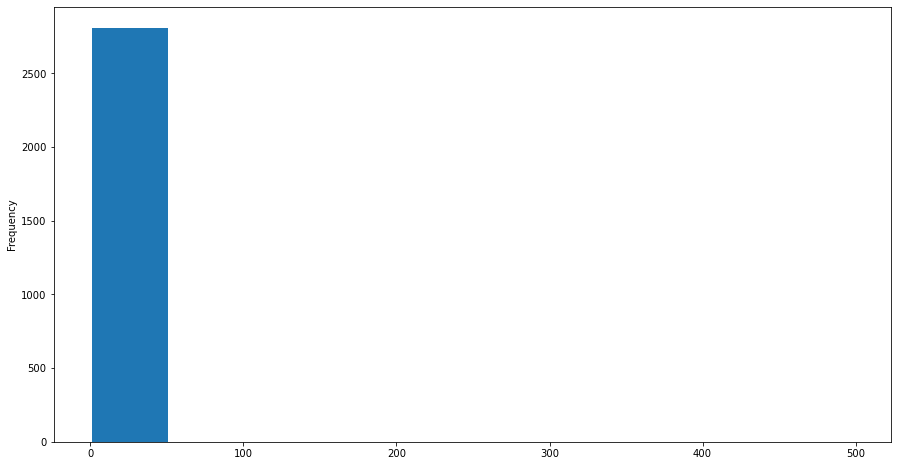

In [53]:
df.loc[:,'returnOnAssets'].value_counts().plot(kind='hist',figsize=(15,8))

<AxesSubplot:ylabel='Frequency'>

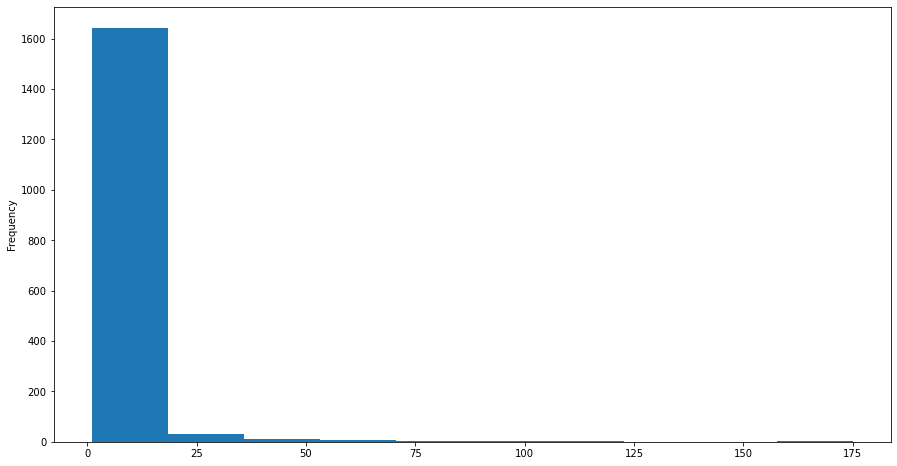

In [54]:
df.loc[:,'GOP3_PerEmp'].value_counts().plot(kind='hist',figsize=(15,8))